In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from statsmodels.stats.proportion import proportions_ztest
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/ab-testing-dataset/test_group.csv
/kaggle/input/ab-testing-dataset/control_group.csv


In [2]:
control=pd.read_csv('/kaggle/input/ab-testing-dataset/control_group.csv',sep=';')
test=pd.read_csv('/kaggle/input/ab-testing-dataset/test_group.csv',sep=';')


In [3]:
control['group'] = 'control'
test['group'] = 'test'
df = pd.concat([control, test], ignore_index=True)

print(df.columns)

Index(['Campaign Name', 'Date', 'Spend [USD]', '# of Impressions', 'Reach',
       '# of Website Clicks', '# of Searches', '# of View Content',
       '# of Add to Cart', '# of Purchase', 'group'],
      dtype='object')


In [4]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Campaign Name        60 non-null     object 
 1   Date                 60 non-null     object 
 2   Spend [USD]          60 non-null     int64  
 3   # of Impressions     59 non-null     float64
 4   Reach                59 non-null     float64
 5   # of Website Clicks  59 non-null     float64
 6   # of Searches        59 non-null     float64
 7   # of View Content    59 non-null     float64
 8   # of Add to Cart     59 non-null     float64
 9   # of Purchase        59 non-null     float64
 10  group                60 non-null     object 
dtypes: float64(7), int64(1), object(3)
memory usage: 5.3+ KB


Campaign Name          0
Date                   0
Spend [USD]            0
# of Impressions       1
Reach                  1
# of Website Clicks    1
# of Searches          1
# of View Content      1
# of Add to Cart       1
# of Purchase          1
group                  0
dtype: int64

In [5]:
# A conversion is defined as at least one purchase. We create a binary column (1 = converted, 0 = not converted)
df['converted'] = df['# of Purchase'].apply(lambda x: 1 if x > 0 else 0)

***Calculating Conversion Rates***

In [6]:
# We calculate the average conversion rate for each group
conversion_rates = df.groupby('group')['converted'].mean()
print("Conversion Rates by Group:\n")
print(conversion_rates)

Conversion Rates by Group:

group
control    0.966667
test       1.000000
Name: converted, dtype: float64


***Performing a Statistical Significance Test (Z-Test)***

In [7]:
# We test whether the difference in conversion rates is statistically significant

# Count of converted users in each group
converted = df.groupby('group')['converted'].sum()

# Total number of users in each group
total = df.groupby('group')['converted'].count()

# Z-test for proportions
z_stat, p_val = proportions_ztest(count=converted, nobs=total)
print(f"\n Z-statistic: {z_stat:.2f}")
print(f" P-value: {p_val:.4f}")


 Z-statistic: -1.01
 P-value: 0.3132


After analyzing the conversion rates of the control and test groups, I found no statistically significant difference between the two. The p-value of 0.31 is well above the commonly accepted threshold of 0.05, suggesting that any observed difference could easily be due to random chance.

Additionally, the z-score of -1.01 further supports this, as it shows that the variation between the groups is minimal in terms of standard deviations.

Based on these results, there is not enough evidence to conclude that the new version leads to a better conversion rate. For now, it may be more reasonable to keep the current version and consider further testing with a larger sample or different metrics.

***Comparing Average Spend per User***

In [8]:
# We analyze whether one group spends more money on average
avg_revenue = df.groupby('group')['Spend [USD]'].mean()
print("\n Average Spend per Group:\n")
print(avg_revenue)


 Average Spend per Group:

group
control    2288.433333
test       2563.066667
Name: Spend [USD], dtype: float64


***Visualizing Conversion Rates***

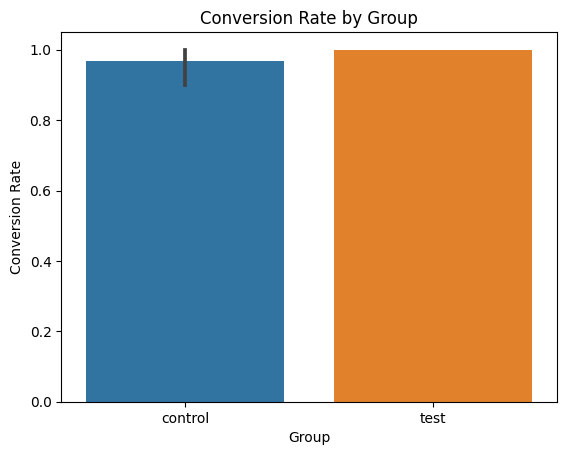

In [9]:
sns.barplot(data=df, x='group', y='converted')
plt.title("Conversion Rate by Group")
plt.ylabel("Conversion Rate")
plt.xlabel("Group")
plt.show()

***Visualizing Revenue Distribution***

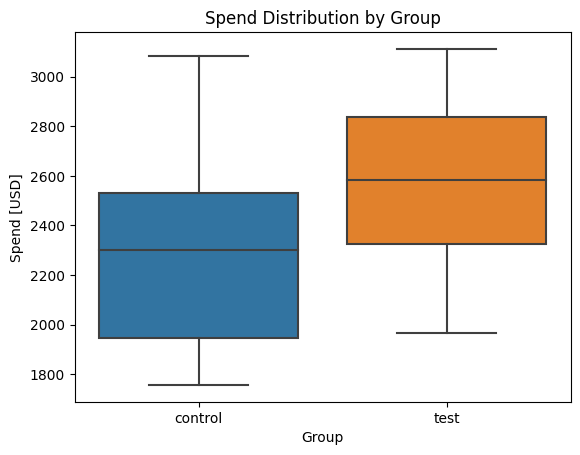

In [10]:
sns.boxplot(data=df, x='group', y='Spend [USD]')
plt.title("Spend Distribution by Group")
plt.ylabel("Spend [USD]")
plt.xlabel("Group")
plt.show()

In [11]:
metrics = [
    'Spend [USD]',
    '# of Website Clicks',
    '# of View Content',
    '# of Add to Cart',
    '# of Purchase'
]

group_means = df.groupby('group')[metrics].mean()
print("Average Metrics by Group:\n")
print(group_means)

Average Metrics by Group:

         Spend [USD]  # of Website Clicks  # of View Content  \
group                                                          
control  2288.433333          5320.793103        1943.793103   
test     2563.066667          6032.333333        1858.000000   

         # of Add to Cart  # of Purchase  
group                                     
control       1300.000000     522.793103  
test           881.533333     521.233333  


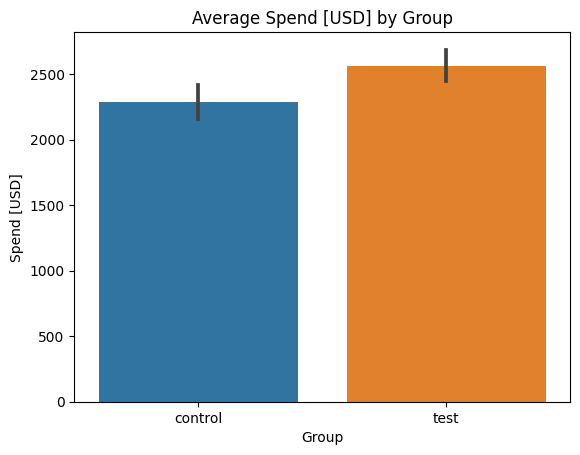

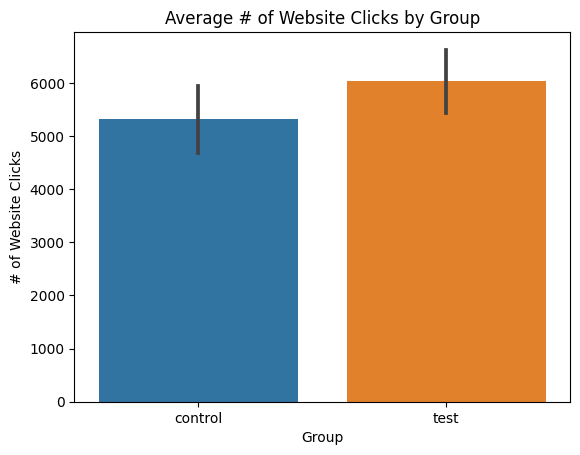

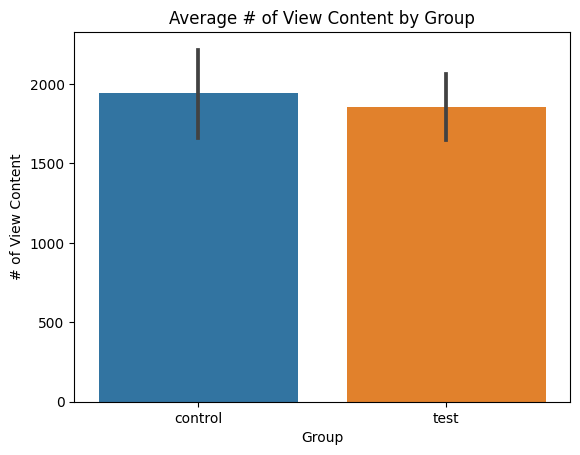

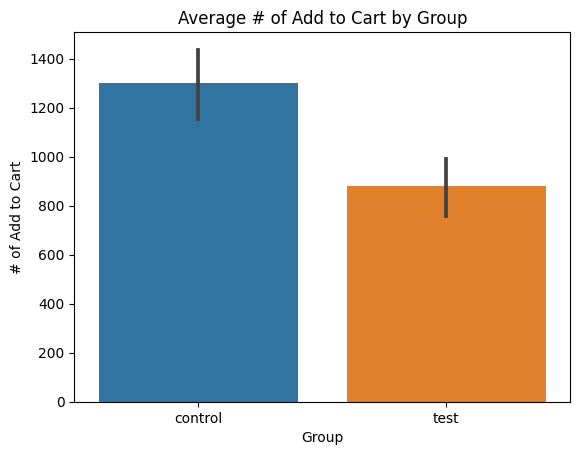

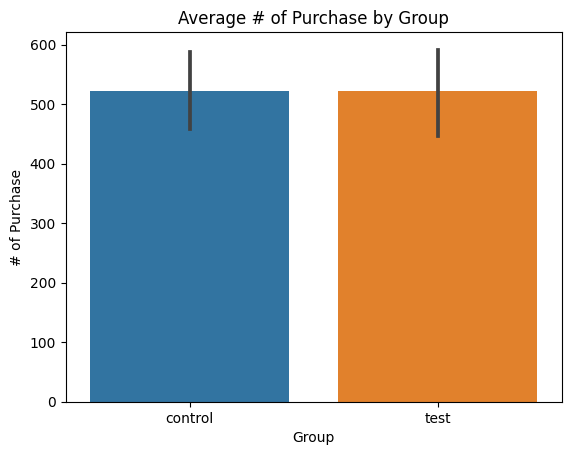

In [12]:
for metric in metrics:
    sns.barplot(data=df, x='group', y=metric)
    plt.title(f"Average {metric} by Group")
    plt.ylabel(metric)
    plt.xlabel("Group")
    plt.show()

## Additional Metrics Analysis

To better understand the campaign’s performance beyond conversion rate, I also compared several other metrics between the control and test groups.


### Spend [USD]
The test group shows a **slightly higher average spend** compared to the control group. This might suggest that users in the test group are either more engaged or exposed to more expensive products. While the difference isn’t dramatic, it could be meaningful if supported by further data.


### # of Website Clicks
Interestingly, the test group had **more average website clicks** than the control group. This indicates that users were interacting more with the site during the campaign, possibly showing greater interest or curiosity. However, this didn’t necessarily lead to higher conversions.


### # of View Content
The control group performed slightly better in terms of content views. This might mean that although users in the test group clicked more, they didn’t engage as deeply with product pages. It could hint at differences in user journey quality between the groups.


### # of Add to Cart
The control group had a **higher average number of add-to-cart actions**, which is quite surprising given the higher clicks from the test group. This could indicate a mismatch between user expectations and what they found, or perhaps friction in the purchase funnel in the test version.


### # of Purchases
Purchases were **very close between both groups**, with the control group just slightly ahead. This aligns with the earlier conversion rate analysis, which showed no significant statistical difference.

---

### Overall Observation
While the test group had **more clicks and slightly higher spend**, these didn’t translate into more conversions or purchases. In fact, the control group performed better in terms of engagement-related actions like add-to-cart and view content.